In [1]:
pwd

'C:\\Users\\Miya\\Desktop\\jp'

In [3]:
cd statisticsGeneratedbySpark

C:\Users\mnan\Desktop\jm\statisticsGeneratedbySpark


In [5]:
cd about_volume

C:\Users\mnan\Desktop\jm\statisticsGeneratedbySpark\about_volume


In [6]:
ls

 Volume in drive C is OS
 Volume Serial Number is 7A31-BC14

 Directory of C:\Users\mnan\Desktop\jm\statisticsGeneratedbySpark\about_volume

01/27/2017  03:59 PM    <DIR>          .
01/27/2017  03:59 PM    <DIR>          ..
01/27/2017  03:59 PM               755 count_h_h.csv
01/27/2017  03:59 PM             3,810 count_h_i.csv
01/27/2017  03:59 PM             1,318 count_R_i.csv
01/27/2017  03:59 PM            23,727 count_R_i_h.csv
01/27/2017  03:59 PM               246 count_R_i_holiday.csv
01/27/2017  03:59 PM             9,579 count_R_i_w.csv
01/27/2017  03:59 PM         4,657,872 count_trip.csv
01/27/2017  03:59 PM            32,692 count_trip_daily.csv
01/27/2017  03:59 PM                79 count_y.csv
01/27/2017  03:59 PM               674 count_y_m.csv
01/27/2017  03:59 PM               538 count_y_w.csv
01/27/2017  03:59 PM            13,804 count_y_w_h.csv
01/27/2017  03:59 PM           163,217 count_y_w_h_h.csv
              13 File(s)      4,908,311 bytes
               2 

In [233]:
cd about_efficiency_speed_distance

C:\Users\Miya\desktop\jp\facts\about_efficiency_speed_distance


In [35]:
%matplotlib inline
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 

daily_ride = pd.read_csv('count_trip_daily.csv', index_col = 0, parse_dates = ['date']).sort_values('date').set_index('date')

In [22]:
monthly_ride =pd.read_csv('count_trip_daily.csv', index_col = 0, parse_dates = ['date']).sort_values('date')

In [24]:
monthly_ride['year'] = list(map(lambda x:x.year,monthly_ride['date']))
monthly_ride['month'] = list(map(lambda x:x.month,monthly_ride['date']))

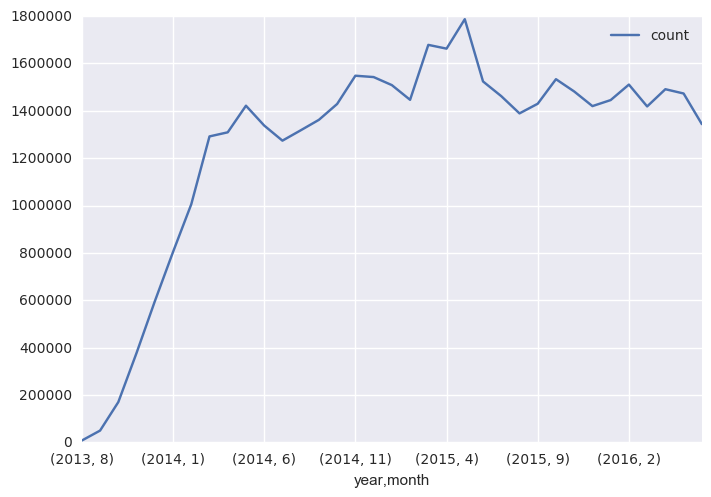

In [33]:
import seaborn as sns
monthly_ride.groupby(['year','month']).sum().plot()

In [ ]:
monthly_ride['year'] = list(map(lambda x:x.year,monthly_ride['date']))

In [6]:
cd ../

C:\Users\Miya\Desktop\jp\facts


In [7]:
daily_gain = pd.read_csv('trip_gain_date.csv', index_col = 0, parse_dates = ['date']).sort_values('date').set_index('date')

In [36]:
daily_ride.head()

,count
date,
2013-08-01,12
2013-08-02,13
2013-08-03,1
2013-08-05,107
2013-08-06,22


C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=1,center=False).mean()
  from ipykernel import kernelapp as app


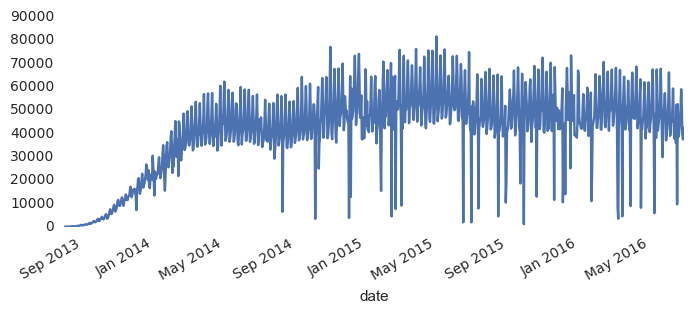

In [135]:
import seaborn
ax = pd.rolling_mean(daily_ride,1).plot(figsize = (8,3))
ax.set_axis_bgcolor("white")
plt.legend([])#['Smoothed Daily Trip Count'])
#ax.set_xlim(pd.Timestamp('2013-10-01'), pd.Timestamp('2016-06-01'))
#count = ['10k','20k','30k','40k','50k','60k']  ## labels are wrong
#ax.set_yticklabels(count)

C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=90,center=False).mean()
  if __name__ == '__main__':


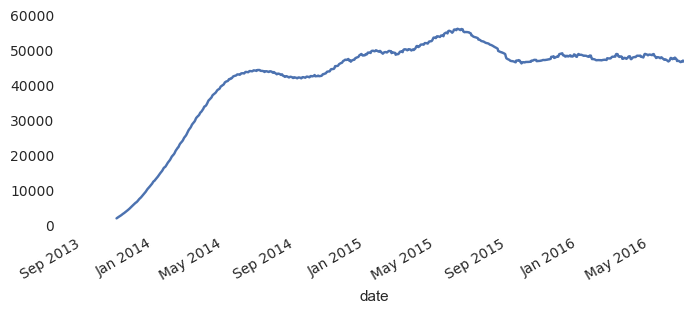

In [136]:
ax = pd.rolling_mean(daily_ride,90).plot(figsize = (8,3))
ax.set_axis_bgcolor("white")
plt.legend([])#['Smoothed Daily Trip Count'])
#ax.set_xlim(pd.Timestamp('2013-10-01'), pd.Timestamp('2016-06-01'))
#count = ['10k','20k','30k','40k','50k','60k']  ## labels are wrong
#ax.set_yticklabels(count)

In [59]:
daily_ride.tail()

,count
date,
2016-06-26,51363
2016-06-27,39832
2016-06-28,37497
2016-06-29,38168
2016-06-30,42425


In [224]:
daily_ride_reset = daily_ride.reset_index()
daily_ride_2016 = daily_ride_reset[daily_ride_reset['date']>=pd.Timestamp('2015-09-01')].reset_index(drop=True)

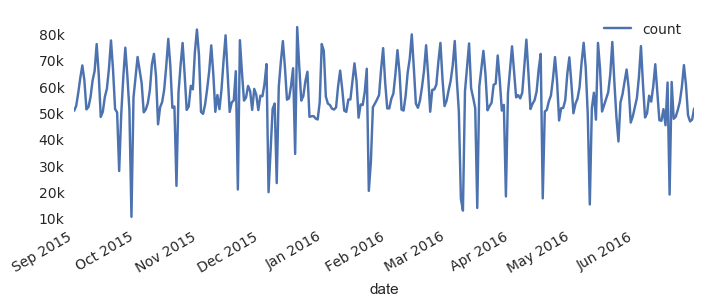

In [225]:
ax = daily_ride_2016.set_index('date').plot(figsize = (8,3))
ax.set_axis_bgcolor("white")
count = ['10k','20k','30k','40k','50k','60k','70k','80k']  ## labels are wrong
ax.set_yticklabels(count)

In [226]:
daily_ride_2016['date'] = pd.to_datetime(daily_ride_2016['date'])
daily_ride_2016 = daily_ride_2016.set_index('date')

In [227]:
daily_ride_2016 = daily_ride_2016.reset_index()

In [228]:
daily_ride_2016['year_month'] = list(map(lambda x:str(x.year)+str(x.month),daily_ride_2016['date']))

In [230]:
daily_ride_2016.groupby('year_month').sum()

,count
year_month,
201510,1533511
201511,1481603
201512,1419837
20159,1429846
20161,1445285
20162,1510722
20163,1418464
20164,1491215
20165,1473073


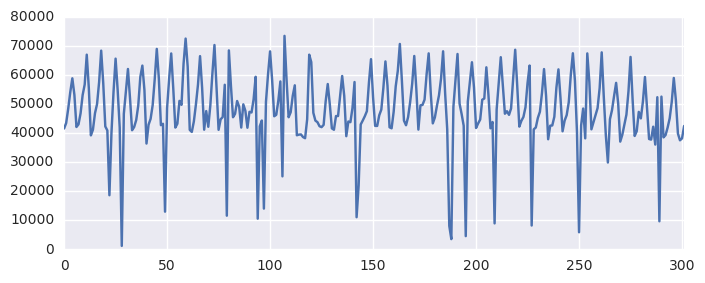

In [235]:
daily_ride_2016['count'].plot(figsize = (8,3))

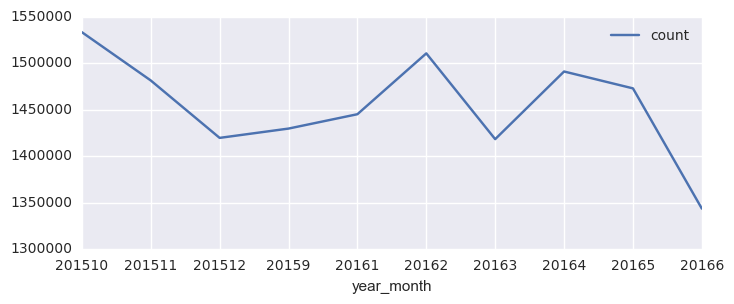

In [232]:
daily_ride_2016.groupby('year_month').sum().plot(figsize = (8,3))

C:\Users\mnan\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]
C:\Users\mnan\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


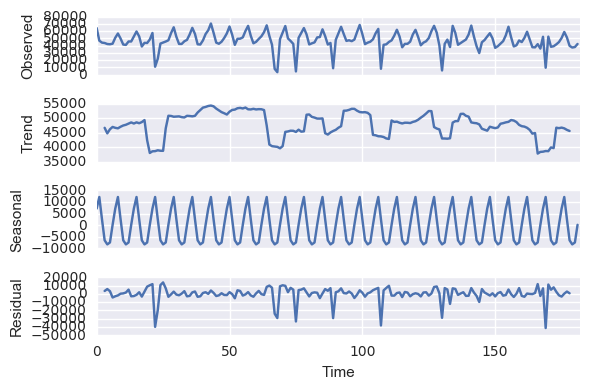

In [214]:
res = sm.tsa.seasonal_decompose(daily_ride_2016['count'].values,freq = 7)  
fig = res.plot()  
fig.show()  

In [6]:
y_w_h = pd.read_csv('count_y_w_h.csv', index_col = 0)

In [433]:
import pandas as pd
import colorlover as cl
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
tls.set_credentials_file(username='miya117', api_key='GbOzqxyanlm1zE3FG7Ww')


data = []
counter = 0
for col in Ning.columns:
    if col != 'holiday':
        data.append(
            go.Area(t=Ning['holiday'],
                    r=Ning[col],
                    marker=dict(color=cl.scales['9']['seq']['PuBu'][counter]),
                    name=col) )
        counter+=1

fig = go.Figure(data=data, layout=go.Layout(orientation=270, barmode='stack'))
url = py.plot(fig, filename='holiday-hour-rose-chart')

IndexError: list index out of range

In [429]:
hour2

[1153240, 42247]

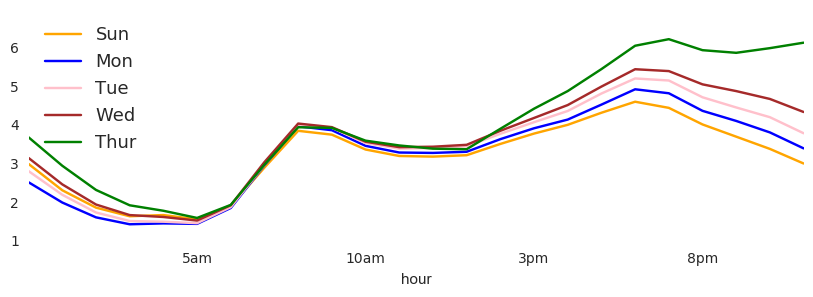

In [10]:
weekofday = [0,1,2,3,4]
import seaborn
labels = ['Sun','Mon','Tue','Wed','Thur']
colors = ['orange','blue','pink','brown','green']
clock = ['','5am','10am','3pm','8pm']
count = ['1','2','3','4','5','6']
for day,label,color in zip(weekofday,labels,colors):
    ax = y_w_h[y_w_h['weekofday']==day].groupby('hour').sum()['count'].plot(color = color,figsize=(10,3),label =label)
    ax.set_axis_bgcolor("white")
    plt.legend(loc='best',prop={'size':13})
    ax.set_xticklabels(clock)
    ax.set_yticklabels(count)

    #plt.title('Close Price Comparison',fontsize=20)

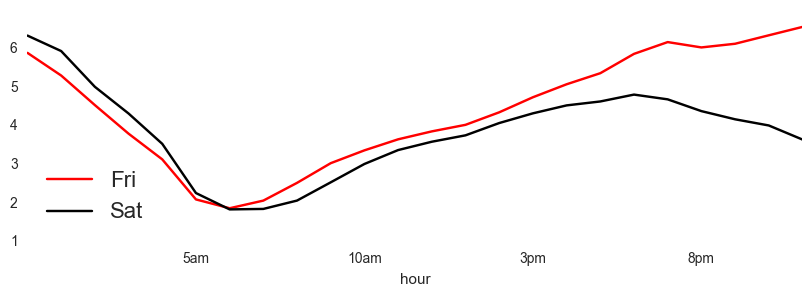

In [30]:
weekofday = [5,6]
labels = ['Fri','Sat']
colors = ['red','black']
clock = ['','5am','10am','3pm','8pm']
count = ['1','2','3','4','5','6']
for day,label,color in zip(weekofday,labels,colors):
    ax = y_w_h[y_w_h['weekofday']==day].groupby('hour').sum()['count'].plot(color = color,figsize=(10,3),label=label)
    ax.set_axis_bgcolor("white")
    plt.legend(loc='best',prop={'size':16})
    ax.set_xticklabels(clock)
    ax.set_yticklabels(count)

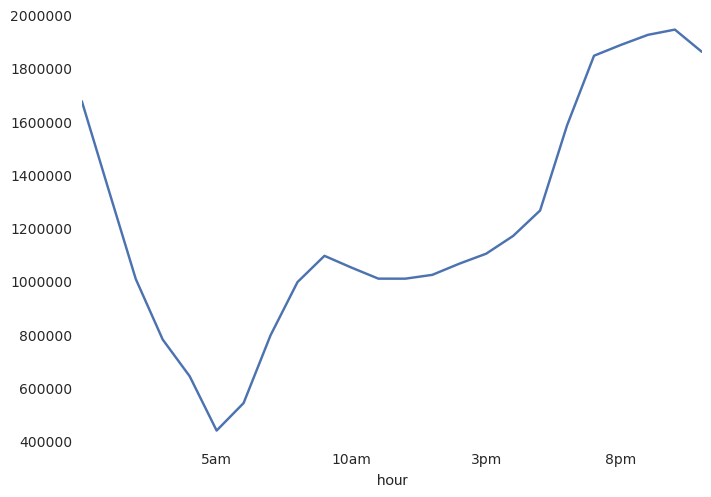

In [262]:
y_w_h = pd.read_csv('count_y_w_h.csv', index_col = 0).sort_values('hour').set_index('hour')
ax = hour_stat['count(date)'].plot(kind = 'line')
labels = ['','5am','10am','3pm','8pm']
ax.set_axis_bgcolor("white")
ax.set_xticklabels(labels)

In [260]:
icon_stat = pd.read_csv('stats_icon.csv', index_col = 0).set_index('icon')
icon_stat

,count(date),avg(Trip_distance_abs),stddev_samp(Trip_distance_abs),min(Trip_distance_abs),max(Trip_distance_abs),avg(speed),stddev_samp(speed),min(speed),max(speed),avg(Efficiency),stddev_samp(Efficiency),min(Efficiency),max(Efficiency)
icon,,,,,,,,,,,,,
fog,297756,3.619020,3.406005,0.01,217.31,0.260155,0.092569,0.170005,1.245283,1.677254,20.733542,0.0,3300.0
partly-cloudy-day,3329346,3.643037,3.474877,0.01,383.64,0.248950,0.084855,0.170004,1.246957,1.665982,33.814042,0.0,23400.0
clear-day,7699392,3.659057,3.481689,0.01,378.91,0.251497,0.087595,0.170003,1.250000,1.669084,28.344188,0.0,14670.0
rain,1858622,3.422077,3.251687,0.01,246.28,0.250300,0.083107,0.170004,1.248322,1.546275,24.087152,0.0,14970.0
cloudy,1606683,3.492120,3.292239,0.01,439.53,0.257702,0.090350,0.170004,1.246875,1.566665,24.059377,0.0,14850.0
clear-night,10255704,3.426026,3.141099,0.01,659.58,0.264397,0.092453,0.170004,1.248322,1.465904,21.674929,0.0,14940.0
wind,1476106,3.401497,3.228376,0.01,165.00,0.251115,0.085021,0.170004,1.247442,1.519724,20.646488,0.0,8400.0
partly-cloudy-night,2473355,3.462771,3.132064,0.01,216.40,0.264947,0.093285,0.170004,1.248000,1.477454,21.454777,0.0,12000.0
snow,185867,3.593777,3.328405,0.01,116.18,0.249177,0.084762,0.170005,1.238095,1.761855,34.882035,0.0,7470.0


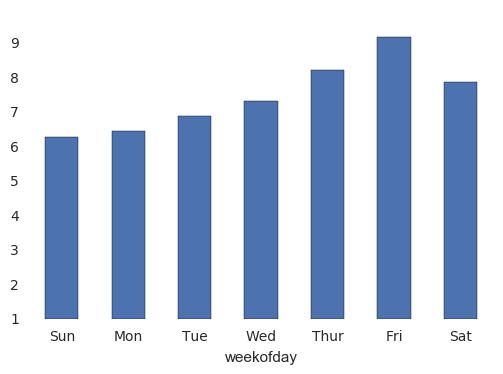

In [9]:
import pandas as pd
import seaborn
count_y_w = pd.read_csv('count_y_w.csv', index_col = 0)
ax = count_y_w.groupby('weekofday').sum()['count'].plot(kind = 'bar',label =None,figsize = (6,4))
ax.set_axis_bgcolor("white")
labels = ['Sun','Mon','Tue','Wed','Thur','Fri','Sat']
plt.xticks(rotation=360)
ax.set_xticklabels(labels)
cnt = ['1','2','3','4','5','6','7','8','9']
ax.set_yticklabels(cnt)

In [174]:
monthly_ride = pd.read_csv('count_y_m.csv', index_col = 0)

In [175]:
monthly_ride.head()

,year,month,count
0,2014,2,1005242
1,2014,11,1548159
2,2014,8,1344941
3,2014,5,1421503
4,2014,12,1645787


In [181]:
monthly_ride['date'] = monthly_ride['year']*1000+monthly_ride['month']
monthly_ride['date'] = monthly_ride['date'].apply(str)
monthly_ride['date'] = list(map(lambda x: datetime.strptime(x,'%Y0%m'), monthly_ride['date']))
monthly_ride = monthly_ride.sort_values('date').set_index('date')

In [133]:
daily_gain.head()

,date,avg(Fare_amount_abs)
446,2013-08-01,11.166667
868,2013-08-02,292.226923
993,2013-08-03,3.250000
260,2013-08-05,5.331682
691,2013-08-06,5.096364


In [100]:
daily_ride['date'] = daily_ride['date'].map(lambda x: 1000*x.year + x.month)
daily_ride['date'] = daily_ride['date'].apply(str)

In [101]:
daily_ride['date'] = list(map(lambda x: datetime.strptime(x,'%Y0%m'), daily_ride['date']))

In [117]:
daily_ride = daily_ride.set_index('date')

In [170]:
daily_ride.head()

,count
date,
2013-08-01,12
2013-08-02,13
2013-08-03,1
2013-08-05,107
2013-08-06,22


In [8]:
month_gain = pd.read_csv('trip_gain_month.csv', index_col = 0)

In [9]:
month_gain['year'] = month_gain['year'].apply(str)
month_gain['month'] = month_gain['month'].apply(str)

In [10]:
month_gain['date'] = list(map(lambda x: '-'.join(x), zip(month_gain['year'],month_gain['month'])))

In [11]:
month_gain['date'] = list(map(lambda x: datetime.strptime(x,'%Y-%m'), month_gain['date']))

In [12]:
month_gain = month_gain.sort_values('date').set_index('date')

In [13]:
month_gain.head()

,year,month,avg(Fare_amount_abs)
date,,,
2013-08-01,2013,8,13.933222
2013-09-01,2013,9,13.222284
2013-10-01,2013,10,12.550641
2013-11-01,2013,11,12.394260
2013-12-01,2013,12,12.282542


 # Monthly gain trend

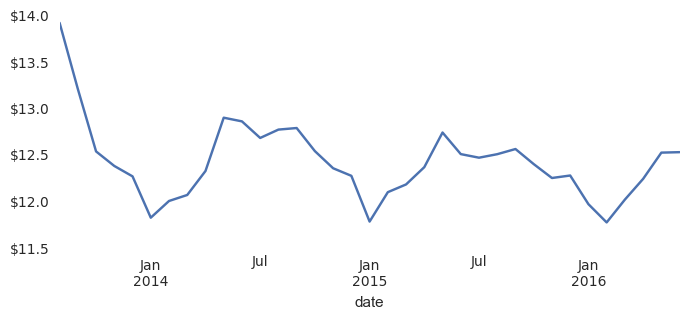

In [19]:
import seaborn
ax = month_gain['avg(Fare_amount_abs)'].plot(figsize = (8,3))
ax.set_axis_bgcolor("white")
labels = ['$11.5','$12.0','$12.5','$13.0','$13.5','$14.0']
ax.set_yticklabels(labels)

# 90 days Moving Average of Ride Amount

C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=90,center=False).mean()
  if __name__ == '__main__':


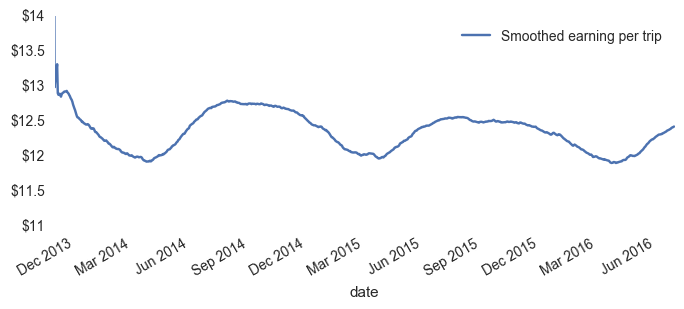

In [48]:
ax = pd.rolling_mean(daily_gain, 90).plot(figsize = (8,3))
ax.set_xlim(pd.Timestamp('2013-11-01'), pd.Timestamp('2016-07-01'))
ax.set_ylim(11,14)
ax.set_axis_bgcolor("white")
plt.legend(['Smoothed earning per trip'])
count = ['$11','$11.5','$12','$12.5','$13','$13.5','$14']
ax.set_yticklabels(count)

In [147]:
daily_gain.head()

,avg(Fare_amount_abs)
date,
2013-08-01,11.166667
2013-08-02,292.226923
2013-08-03,3.250000
2013-08-05,5.331682
2013-08-06,5.096364


In [151]:
len(pd.rolling_mean(daily_ride, 90).index.values)

C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=90).mean()
  if __name__ == '__main__':


1061

In [152]:
len(pd.rolling_mean(daily_gain, 90).index.values)

C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=90).mean()
  if __name__ == '__main__':


1064

C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=90).mean()
C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=90).mean()
C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=90).mean()
C:\Users\Miya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


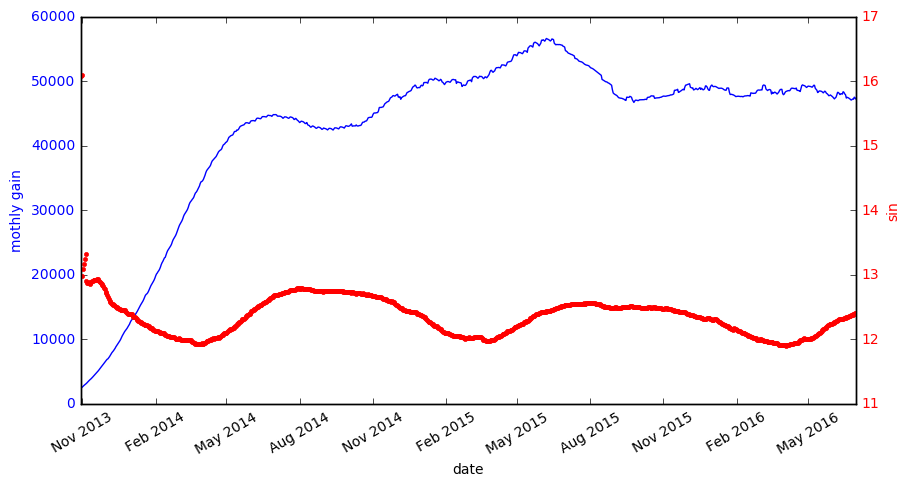

In [165]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.xticks(rotation=30)

t = pd.rolling_mean(daily_ride, 90).index.values
s1 = pd.rolling_mean(daily_ride, 90)['count'].values
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('date')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('mothly gain', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

ax2 = ax1.twinx()
s2 = pd.rolling_mean(daily_gain, 90)['avg(Fare_amount_abs)'].values[:-3]
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('sin', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.show()